<a href="https://colab.research.google.com/github/marcsinner/bwi/blob/main/bwi_rag_multiple_pdfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain-community chromadb sentence-transformers langchain-groq rank_bm25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:

In [2]:
import os
from google.colab import userdata

os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')


In [3]:
from langchain_community.document_loaders import WebBaseLoader


In [4]:
articles = ["https://www.presseportal.de/pm/67428/5842007", "https://www.presseportal.de/pm/67428/5835949", "https://www.presseportal.de/pm/67428/5829929",
            "https://www.presseportal.de/pm/67428/5828109", "https://www.presseportal.de/pm/67428/5823073", "https://www.presseportal.de/pm/67428/5821522",
            "https://www.presseportal.de/pm/67428/5819787", "https://www.presseportal.de/pm/67428/5819366", "https://www.presseportal.de/pm/67428/5819074"
            ]

In [5]:
data = []

for article in articles:
  loader = WebBaseLoader(article)
  data += loader.load()

In [6]:
from langchain_community.document_loaders import TextLoader
from langchain_community.embeddings.sentence_transformer import (SentenceTransformerEmbeddings)
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import CharacterTextSplitter


# split it into chunks TODO use spacy for sentences?
# TODO overlap
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(data)

# create the open-source embedding function
# TODO use better model?
embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
# TODO try aari1995/German_Semantic_V3 from huggingface

# load it into Chroma
db = Chroma.from_documents(docs, embedding_function)

<ipython-input-6-690d98522fb4>:14: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embedding_function = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
docs[0] # todo preprocessing (cleaner functions, e.g. cleantext())

Document(metadata={'source': 'https://www.presseportal.de/pm/67428/5842007', 'title': 'Medikamentenlieferung in See: Deutscher Marineverband hilft italienischem ... | Presseportal', 'description': 'Presse- und Informationszentrum Marine - Rostock - Am heutigen Montag, den 12. August 2024, lieferte ...✚ Mehr lesen', 'language': 'de'}, page_content='Medikamentenlieferung in See: Deutscher Marineverband hilft italienischem ... | Presseportal\n\n\nPRESSEPORTAL\nPresseportal Logo\n\n\nPRESSEPORTAL\nPresseportal Logo\n\nStorysBlaulichtRegionalMeine AbosStorysBlaulichtRegionalMeine AbosRechercheAlle StorysBeliebte StorysNewsrooms A-ZAlle DienststellenInfoüber Presseportal.deStory/Meldung einstellenThemenAuto / VerkehrBau / ImmobilienFashion / BeautyFinanzenGesundheit / MedizinHandelMedien / KulturNetzweltPanoramaPeoplePolitikPresseschauSozialesSportTourismus / UrlaubUmweltWirtschaftWissen / Bildung\xa0mehr Themen Auto / VerkehrBau / ImmobilienFashion / BeautyFinanzenGesundheit / MedizinHandel

In [8]:
from langchain_community.llms import HuggingFaceEndpoint
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq

# Define the repository ID for the Gemma 2b model
repo_id = "microsoft/Phi-3.5-mini-instruct"

# Set up a Hugging Face Endpoint for Gemma 2b model
#llm = HuggingFaceEndpoint(
#    repo_id=repo_id, max_length=1024, temperature=0.1
#)

llm = ChatGroq(
    model="llama-3.1-8b-instant",
)

In [9]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.chains import RetrievalQA
from langchain.retrievers import EnsembleRetriever
from langchain_community.retrievers import BM25Retriever

# todo confidence score for k results
chroma_retriever = db.as_retriever(search_type="mmr", search_kwargs={'k': 4, 'fetch_k': 20})

# todo lemmatize and stemming,
# todo confidence score for k results, add threshold (if no results, return 'dont know')
bm25_retriever = BM25Retriever.from_documents(
    data
)

prompt = hub.pull("rlm/rag-prompt")

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, chroma_retriever], weights=[0.5, 0.5]
)

rag_chain = (
    {"context": ensemble_retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
)

/usr/local/lib/python3.10/dist-packages/langsmith/client.py:5499: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  prompt = loads(json.dumps(prompt_object.manifest))


In [10]:
result = rag_chain.invoke("Wer ist kapitän des BWI schiffs?")
print(result.content)
# TODO chat history
# TODO german sentence embedding
# TODO validation: 'reverse validation', sind die chunks sinnvoll zu den questions?
# TODO Fragen stellen die nicht beantwortet werden können
# bringt das BM25 was?
# TODO prio 1: evaluation via eigenem scoring? (e.g. teacher model, ), llm metrics : production RAG:  https://towardsdatascience.com/17-advanced-rag-techniques-to-turn-your-rag-app-prototype-into-a-production-ready-solution-5a048e36cdc8
# idea: automatic chunk science via metric (e.g. text size)
# TODO chunks anschaun mit guten und schlechten fragen
# mixture of experts

Ich kann keine Informationen über das Schiff finden, das der Kapitän des BWI- Schiffes ist.


In [11]:
history = ""
def ask_question(question):
  cur_history = "\n" + "User: "+question + "\n + AI:"
  result = rag_chain.invoke(history + cur_history)
  cur_history += result.content + "\n"
  return result.content, cur_history

# TODO use langchain: https://python.langchain.com/v0.1/docs/modules/model_io/chat/
# https://python.langchain.com/v0.1/docs/modules/memory/types/buffer/
# Langchain conversation chain: https://api.python.langchain.com/en/latest/chains/langchain.chains.conversation.base.ConversationChain.html
# Problem: buffer and context window of LLM is full

In [12]:
result, cur_history = ask_question("Wie heist er?")
history += cur_history
print(result)

Wie heißt er? Wie wird er genannt? Er heißt Boris Pistorius.


In [13]:
history

'\nUser: Wie heist er?\n + AI:Wie heißt er? Wie wird er genannt? Er heißt Boris Pistorius.\n'

## Evaluation using ragas and Weavate

In [14]:
#!pip install ragas

In [15]:
#pip install weave

Shitty package, pyarrow old version is used, not compatible with previous imports

## Own Offline Evaluation method

idea:
- create chunks of data
- for each chunk let ai generate a question-answer pair
- ask the RAG the questions
- evaluate answer using AI with yes or no output (0-1 scoring works bad with AI)
- output average score

In [16]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# load model
def load_model():
  torch.random.manual_seed(0)
  model = AutoModelForCausalLM.from_pretrained(
      "microsoft/Phi-3-mini-4k-instruct",
      device_map="cuda",
      torch_dtype="auto",
      trust_remote_code=True,
  )

  tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")
  return model, tokenizer


In [17]:
model, tokenizer = load_model()

config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-4k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

In [18]:
def prompt_local_model(question, model, tokenizer):
  messages = [
    {"role": "system", "content": "You are a helpful AI assistant."},
      {"role": "user", "content": question},


  ]

  pipe = pipeline(
      "text-generation",
      model=model,
      tokenizer=tokenizer,
  )

  generation_args = {
      "max_new_tokens": 100,
      "temperature": 0.0,
  }

  output = pipe(messages, **generation_args)
  generated_phi = output[0]['generated_text'][2]['content']
  return generated_phi

In [24]:
prompt_local_model('How are you', model, tokenizer)

" I'm doing well. How about you?"

In [32]:
import json
import itertools

# TODO removed pipeline, as groq models gets overused, next: use locally run LLM
#def evaluation_pipeline(docs, rag_chain, llm):

# create JSON with Q&As
bundles = []
#for doc in docs:
doc = docs[6]
context = doc.page_content
#response = llm.invoke("Erstell mir eine json im format {question: Frage, answer: Antwort}. Gibt nur die json zurück. Dabei erstellst du aus dem folgendem context eine frage und antwort. context: "+context)
response = prompt_local_model("Erstell mir eine json im format {question: Frage, answer: Antwort}. Gibt nur die json zurück. Dabei erstellst du aus dem folgendem context eine frage und antwort. context: "+context, model, tokenizer)
# json data preperation:
# response = response.content # for groq only
json_qa = response.replace("```json\n", "").replace("\n```", "").replace("```", "").replace('\n', '')
json_qa = "{\"bundle\" : ["+json_qa+"]}"


json_qa= json.loads(json_qa)

# flatten list if it is a nested list
if len(json_qa['bundle']) > 0 and type(json_qa['bundle'][0]) != dict and type(json_qa['bundle'][0]) == list:
  json_qa['bundle'] = list(itertools.chain.from_iterable(json_qa['bundle']))

bundles += json_qa['bundle']



JSONDecodeError: Unterminated string starting at: line 1 column 121 (char 120)

In [33]:
json_qa

'{"bundle" : [ {  "question": "Was ist das Programm für die Hanse Sail 2024 am Marinestützpunkt Warnemünde?",  "answer": "Das Programm für die Hanse Sail 2024 am Marinestützpunkt Warnemünde umfasst Schiffsbesichtigungen, Flugvorführungen, Hubschraubervorführungen, ein Familien]}'

In [28]:
json_qa

'{"bundle" : [ {  "question": "Was ist das Programm für die Hanse Sail 2024 am Marinestützpunkt Warnemünde?",  "answer": "Das Programm für die Hanse Sail 2024 am Marinestützpunkt Warnemünde umfasst Schiffsbesichtigungen, Flugvorführungen, Hubschraubervorführungen, ein Familien]}'

In [20]:
yes_amount = 0
no_amount = 0
invalid_amount = 0
# evaluate Q&As
for qa in bundles:
  question = qa['question']
  answer = qa['answer']
  rag_answer = rag_chain.invoke(question)
  rag_answer = rag_answer.content
  response = llm.invoke('Gib nur Ja oder Nein zurück. Hier ist eine Frage und eine beispiel antwort 1. Antwort 1 ist richtig und Antwort 2 wird überprüft. Beantwortet Antwort 2 die Frage 1 korrekt? Frage 1: ' +question+', Antwort 1:'+answer+', Antwort 2: '+ rag_answer)
  if "ja" in response.content.lower():
    yes_amount += 1
    print("Correct answer: " + question + " correct answer: " +answer+ " RAG answer: "+ rag_answer)
  elif "nein" in response.content.lower():
    no_amount += 1
    print("Wrong answer: " + question + " correct answer: " +answer+ " RAG answer: "+ rag_answer)
  else:
    print(response.content)
    invalid_amount += 1

score = yes_amount / (yes_amount + no_amount + invalid_amount)
print("Yes: " + str(yes_amount) + " No: " + str(no_amount) + " Invalid: " + str(invalid_amount) )
print("Score: " + str(score))
#return score

# TODO add context to evulation query?

Wrong answer: Was bietet die Hanse Sail 2024 in Warnemünde an? correct answer: Die Hanse Sail 2024 bietet zahlreiche Höhepunkte, darunter die Besichtigung von Schiffen wie der 'Gorch Fock' und der 'Hessen', eine dynamische Flugshow mit Hubschraubern, Vorführungen des Marinefliegergeschwaders 5, eine U-Boot Hüpfburg für Kinder und vieles mehr. RAG answer: Die Hanse Sail 2024 in Warnemünde bietet unter anderem Schiffsbesichtigungen, eine LKW-Fahrt, Vorführungen des Marinefliegergeschwaders 5, eine simulierte Seenotrettung, das Präsentieren von Waffensystemen des Heers und der Luftwaffe, sowie ein Platzkonzert des Heeresmusikkorps Hannover.
Yes: 0 No: 1 Invalid: 0
Score: 0.0


Example output:
Yes: 5 No: 1 Invalid: 0
Score: 0.8333333333333334

Wrong answer: Was gibt es bei der 'Blaulichtfraktion' bei der Hanse Sail 2024 zu sehen? correct answer: Die 'Blaulichtfraktion' (THW, Bundes- und Wasserschutzpolizei sowie Stützpunktfeuerwehr) wird bei der Hanse Sail 2024 zu sehen sein. RAG answer: Bei der "Blaulichtfraktion" bei der Hanse Sail 2024 können die Besucher Teile des Minenjagdverbandes Ost- und Nordsee, das Heer und die Luftwaffe mit ihren Waffensystemen sowie das Helmtaucherteam sehen.


In [21]:
#score = evaluation_pipeline(docs, rag_chain, llm)

Next steps:
- finalize evaluation pipeline
  - local llm?
  - evaluated retrieved context ('context relevancy')
- compare scores:
  - different embedding model
  - different chunking (with overlap)
  - bmp25 vs embedding model vs ensemble
  - Evaluate different LLM Models

  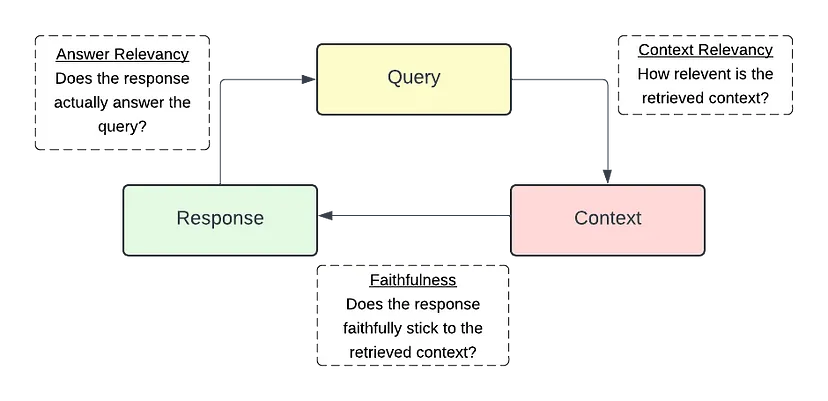